# INM706 - Deep Learning for Sequence Analysis

Authors: Laerte Adami - Elisa Troschka

Source: 
- https://towardsdatascience.com/a-comprehensive-guide-to-neural-machine-translation-using-seq2sequence-modelling-using-pytorch-41c9b84ba350#30b6
- https://pytorch.org/tutorials/intermediate/seq2seq_translation_tutorial.html#evaluation

English vocabulary size: 583
Italian vocabulary size: 822
Completed epoch: 1, loss: 5.797
Completed epoch: 2, loss: 3.587
Completed epoch: 3, loss: 2.684
Completed epoch: 4, loss: 2.519
Completed epoch: 5, loss: 2.447
Completed epoch: 6, loss: 2.376
Completed epoch: 7, loss: 2.32
Completed epoch: 8, loss: 2.28
Completed epoch: 9, loss: 2.24
Completed epoch: 10, loss: 2.208
Completed epoch: 11, loss: 2.176
Completed epoch: 12, loss: 2.144
Completed epoch: 13, loss: 2.107
Completed epoch: 14, loss: 2.071
Completed epoch: 15, loss: 2.037
Completed epoch: 16, loss: 2.005
Completed epoch: 17, loss: 1.976
Completed epoch: 18, loss: 1.953
Completed epoch: 19, loss: 1.942
Completed epoch: 20, loss: 1.915
Completed epoch: 21, loss: 1.894
Completed epoch: 22, loss: 1.86
Completed epoch: 23, loss: 1.84
Completed epoch: 24, loss: 1.818
Completed epoch: 25, loss: 1.8
Completed epoch: 26, loss: 1.78
Completed epoch: 27, loss: 1.77
Completed epoch: 28, loss: 1.765
Completed epoch: 29, loss: 1.742
Com

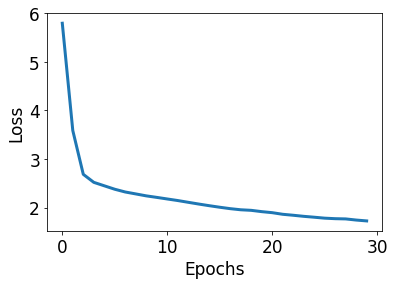

In [5]:
import time
from Utilities.lstmHandler import EncoderLSTM, DecoderLSTM
from Utilities.modelHandler import LSTModel
from Utilities.LanguageDataset import LanguageDataset#, my_collate_fn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.nn import CrossEntropyLoss as CEL
from torch.optim import Adam

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

plt.rcParams['font.size'] = 17

start_token = '<BoS>'
end_token = '<EoS>'

dataset = LanguageDataset(data_path="Data/eng_ita.tsv", start_token = start_token, end_token = end_token)

embedding_size = 256

loss_func = CEL()

end_index = dataset.from_ita[end_token]
start_index = dataset.from_ita[start_token]

trainloader = DataLoader(dataset, batch_size = 100)

print("English vocabulary size: {}".format(dataset.eng_voc_size))
print("Italian vocabulary size: {}".format(dataset.ita_voc_size))

encoder = EncoderLSTM(vocabulary_size = dataset.eng_voc_size,
                     embedding_size = embedding_size,
                     num_layers = 1, 
                     bidirectional = False)

decoder = DecoderLSTM(vocabulary_size = dataset.ita_voc_size,
                     embedding_size = embedding_size,
                     num_layers = 1, 
                     bidirectional = False)

model = LSTModel(encoder = encoder, 
                 decoder = decoder, 
                 encoder_optimizer = Adam(encoder.parameters()), 
                 decoder_optimizer = Adam(decoder.parameters()),
                 loss_function = loss_func, 
                 eos_token = end_index, 
                 bos_token = start_index)

start_time = time.time()
L = model.train_model(trainloader, 
                  max_epochs = 30,
                  save_every_epochs = 20,
                  ckp_name = 'test')
print("--------------------------------")
print("Time required: {}".format(time.time()-start_time))
      
fig, ax = plt.subplots()
ax.plot(L, linewidth = 3)
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss");

## Training

In [6]:
X, y, trans = model.evaluate_model(trainloader, max_length=20)# enc_ckp = "test_enc_10.pth", dec_ckp="test_dec_10.pth")

In [10]:
ids = 4
print("English: " + dataset.translate(X[ids],'eng'))
print("Italian: " + dataset.translate(y[ids],'ita'))
print("Translation: " + dataset.translate(trans[ids],'ita'))

English:  <BoS> Today is June 18th and it is Muiriel s birthday <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <EoS>
Italian:  <BoS> Oggi è il 18 di giugno ed è il compleanno di Muiriel <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <EoS>
Translation:  <BoS> Non non che che che che non <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <UNK> <EoS>


In [22]:
sent = result[67]
print("English: " + dataset.translate(sent[0],'eng'))
print("Italian: " + dataset.translate(sent[1],'ita'))
print("Translation: " + dataset.translate(sent[2],'ita'))

English:  <BoS> You should sleep <EoS>
Italian:  <BoS> Dovrebbe dormire <EoS>
Translation:  <BoS> Dovresti dormire <EoS>


In [23]:
sent = result[34]
print("English: " + dataset.translate(sent[0],'eng'))
print("Italian: " + dataset.translate(sent[1],'ita'))
print("Translation: " + dataset.translate(sent[2],'ita'))

English:  <BoS> You re in better shape than I am <EoS>
Italian:  <BoS> Tu sei più in forma di me <EoS>
Translation:  <BoS> Voi più in in di me <EoS>
